# Hello Python and Jupyter

In this notebook you will:

* Learn how to use a Jupyter notebook such as this one
* Get a very quick tour of Python syntax and scientific libraries
* Learn some IPython features that we will use in later tutorials

## What is this?

This is Jupyter notebook running in a personal "container" just for you, stocked with example data, demos, and tutorials that you can run and modify. All of the software you'll need is already installed and ready to use.

## Run some Python code!

To run the code below:

1. Click on the cell to select it.
2. Press `SHIFT+ENTER` on your keyboard or press the <button class='btn btn-default'><span class='fa fa-step-forward'></span > Run</button> button in the toolbar above (in the toolbar above!).

In [1]:
1 + 1

2

Notice that you can edit a cell and re-run it.

The notebook document mixes executable code and narrative content. It supports text, links, embedded videos, and even typeset math: $\int_{-\infty}^\infty x\, d x = \frac{x^2}{2}$

## Whirlwind Tour of Python Syntax

### Lists

The cell below defines a list called stuff with 4 elements. Python does not require lists to be of the same type.

#### Exercise:
* Adding more elements to the list (append, extend, insert, +)
* Try printing elements of the list using slices

In [2]:
stuff = [4, 'a', 8.3, True]

To index the first element use [0]. The final element can be indexed by [-1]

In [3]:
stuff[0]  # the first element

4

In [4]:
stuff[-1]  # the last element

True

### Dictionaries (Mappings)
Dictonaries are used a lot when using Bluesky. One example is the RE.md dictionary which holds the metadata. The type is a RedisJSONDict.

#### Exercise: edit the value of a prexisting key in the dictionary

In [5]:
d = {'a': 1, 'b': 2}

In [6]:
d

{'a': 1, 'b': 2}

In [7]:
d['b']

2

In [8]:
d['c'] = 3

In [9]:
d

{'a': 1, 'b': 2, 'c': 3}

**TIP:** For large or nested dictionaries, it is more convient to use `list()`.  Often custom python objects can be interrogated in the same manner.

In [10]:
list(d)

['a', 'b', 'c']

Using a for loop also provides a clear display for the keys and values in the dictionary.

In [11]:
for key, value in d.items():
    print(f"{key}: {value}")

a: 1
b: 2
c: 3


### Functions

#### Exercise:
* run the following 2 cells and see the output of `f?`
* add a doc string to the function `f`, a doc string is started with `"""`
* re run the two cells and see what changes

In [ ]:
def f(a, b):
    """_summary_

    Args:
        a (int): _description_
        b (int): _description_

    Returns:
        _type_: _description_
    """
    return a + b

In IPython `f?` or `?f` display information about `f`, such as its arguments.

In [13]:
f?

Signature: f(a, b)
Docstring: <no docstring>
File:      /var/folders/yn/ngdxsm453m3g9t3srb4x3m280000gp/T/ipykernel_97762/1199521597.py
Type:      function

If the function includes inline documentation (a "doc string") then `?` displays that as well.

In [14]:
f??

Signature: f(a, b)
Docstring: <no docstring>
Source:   
def f(a, b):
    return a + b
File:      /var/folders/yn/ngdxsm453m3g9t3srb4x3m280000gp/T/ipykernel_97762/1199521597.py
Type:      function

Arguments can have default values.

In [15]:
def f(a, b, c=1):
    return (a + b) * c

In [16]:
f(1, 2)

3

In [17]:
f(1, 2, 3)

9

Any argument can be passed by keyword. This is slower to type but clearer to read later.

In [18]:
f(a=1, b=2, c=3)

9

If using keywords, you don't have to remember the argument order.

In [19]:
f(c=3, a=1, b=2)

9

## Classes
Classes will be used for Ophyd objects. The class is the blueprint for the object. It holds data and defines functions. This improves reusability and readability.

In [ ]:
class Det:
    def __init__(self, name, det_type):
        self.name = name
        self.det_type = det_type

    def __repr__(self):
        return f"Det({self.name}, {self.det_type})"
    
    def get_name(self):
        return self.name
    
    def get_type(self): 
        return self.det_type

In [21]:
my_det = Det('P800K', 'pilatus')

In [22]:
my_det.__repr__()

'Det(P800K, pilatus)'

In [23]:
my_det.get_name()

'P800K'

In [24]:
my_det.get_type()

'pilatus'

## Fast numerical computation using numpy

For numerical computing, a numpy array is more useful and performant than a plain list.

In [25]:
import numpy as np

a = np.array([1, 2, 3, 4])

In [26]:
a

array([1, 2, 3, 4])

In [27]:
np.mean(a)

np.float64(2.5)

In [28]:
np.sin(a)

array([ 0.84147098,  0.90929743,  0.14112001, -0.7568025 ])

We'll use the IPython `%%timeit` magic to measure the speed difference between built-in Python lists and numpy arrays.

In [29]:
%%timeit

big = list(range(10000))  # setup line, not timed
sum(big)  # timed

75.5 μs ± 304 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [30]:
%%timeit

big = np.arange(10000)  # setup line, not timed
np.sum(big)  # timed

3.87 μs ± 18.2 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


If a single loops is desired for a longer computation, use `%time` on the desired line.

In [31]:
big = np.arange(10000)  # setup line, not timed
%time np.sum(big)  # timed

CPU times: user 13 μs, sys: 1 μs, total: 14 μs
Wall time: 14.8 μs


np.int64(49995000)

## Plotting using matplotlib

In an interactive setting, this will show a canvas that we can pan and zoom. (Keep reading for what we can do in a non-interactive setting, such as the static web page version of this tutorial.)

<Figure size 640x480 with 0 Axes>

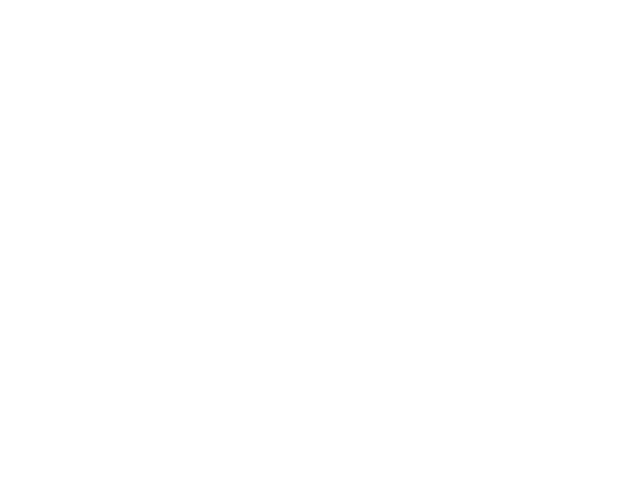

In [1]:
# We just have to do this line once, before we do any plotting.
%matplotlib widget
import matplotlib.pyplot as plt

plt.figure()

We can plot some data like so. In an interactive setting, this will update the canvas above.

In [2]:
plt.plot([1, 1, 2, 3, 5, 8])

In [3]:
new_list = [1, 1, 2, 3, 5, 8]
b = new_list[::-1]
plt.plot(b)

And we can show a noninteractive snapshot of the state of the figure at this point by display the figure itself.

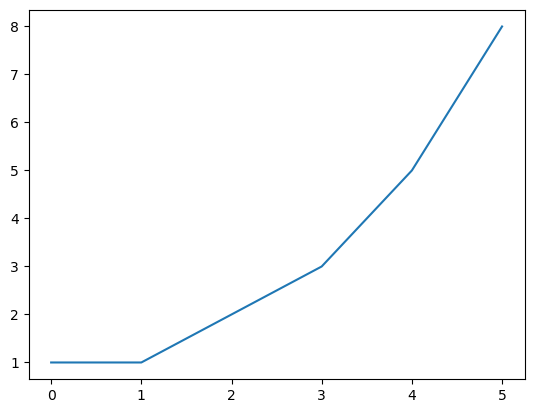

In [34]:
plt.gcf()

Displaying `plt.gcf()` (or any `Figure`) shows a non-interactive snapshot of a figure. Displaying `plt.gcf().canvas` or any `Canvas` gives us another interactive, live-updating view of the figure.

## Interrupting the IPython Kernel

Run this cell, and then click the square 'stop' button in the notebook toolbar to interrupt the infinite loop.

(This is equivalent to Ctrl+C in a terminal.)

In [35]:
# This runs forever -- hit the square 'stop' button in Jupyter to interrupt
# The following is "commented out". Un-comment the lines below to run them.
# while True:
#     continue

## "Magics"

The code entered here is interpreted by _IPython_, which extends Python by adding some conveniences that help you make the most out of using Python interactively. It was originally created by a physicist, Fernando Perez.

"Magics" are special IPython syntax. They are not part of the Python language, and they should not be used in scripts or libraries; they are meant for interactive use.

The `%run` magic executes a Python script.

hello world


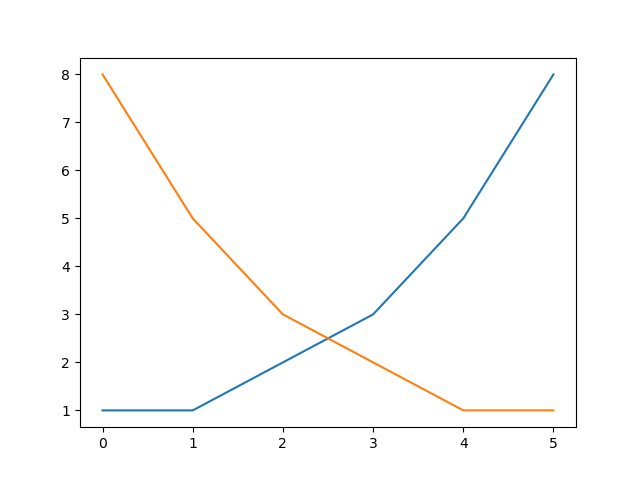

In [5]:
%run hello_world.py

When the script completes, any variables defined in that script will be dumepd into our namespace. For example (as we will see below), this script happens to define a variable named `message`. Now that we have `%run` the script, `message` is in our namespace.

In [6]:
message

'hello world'

This behavior can be confusing, in the sense that the reader has to do some digging to figure out where ``message`` was defined and what it is, but it has its uses. Throughout this tutorial, we will use the `%run` magic as a shorthand for running boilerplate configuration code and defining variables representing hardware.

The `%load` magic copies the contents of a file into a cell but does not run it.

In [9]:
# %load hello_world.py
message = 'hello world'
print(message)


hello world


If you get an error, `%debug` is a useful tool

In [39]:
f(a=1, b=2, c=3, d=4)

TypeError: f() got an unexpected keyword argument 'd'

In [ ]:
# %debug

Execute the cell a second time to actually run the code. Throughout this tutorial, we use the `%load` magic to load solutions to exercises.

## System Shell Access

Any input line beginning with a `!` character is passed verbatim (minus the `!`, of course) to the underlying operating system.

In [ ]:
!ls